In [66]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from StringIO import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [67]:
def convert_yes_no(txt):
    if 'yes' in txt:
        return 1
    else:
        return 0

In [68]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [69]:
df = pd.read_csv('/home/sakshi/Desktop/12/tennis.csv')

In [70]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [71]:
df.windy = df.windy.astype(int)
df.play = df.play.apply(convert_yes_no)

In [72]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1
5,rainy,cool,normal,1,0
6,overcast,cool,normal,1,1
7,sunny,mild,high,0,0
8,sunny,cool,normal,0,1
9,rainy,mild,normal,0,1


In [73]:
df = pd.get_dummies(df)
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,0,1
6,1,1,1,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,1,0,0,0,1,0,1


In [74]:
X_train = df.loc[:, df.columns != 'play']

In [75]:
Y_train = df.play

In [76]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [77]:
clf = clf.fit(X_train,Y_train)

In [78]:
clf.score()

TypeError: score() takes at least 3 arguments (1 given)

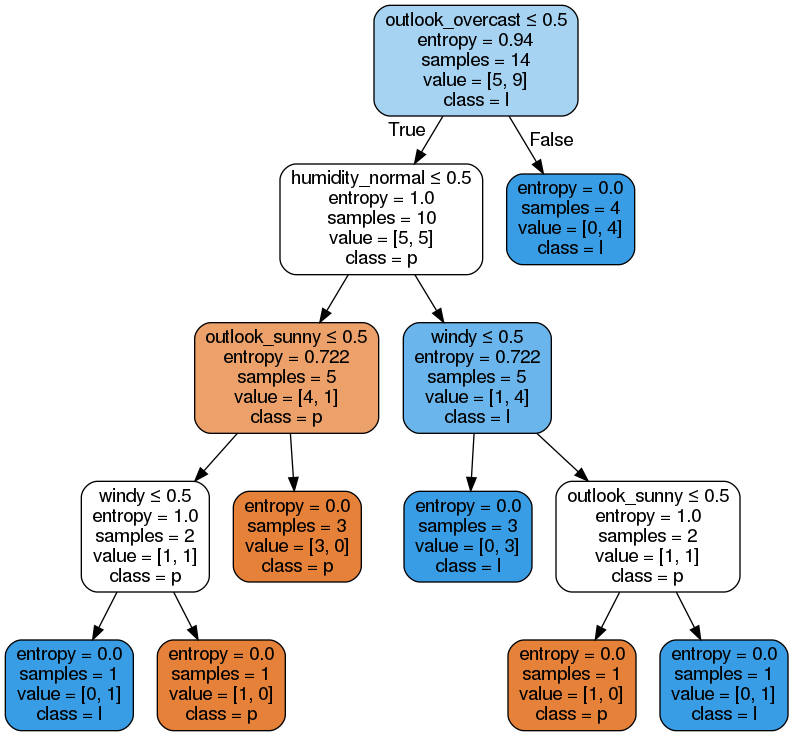

In [79]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

In [80]:
#get importance
importance=clf.feature_importances_

In [81]:
for i,v in enumerate(importance):
    print("features; %0d, score: %.5f" %(i,v))

features; 0, score: 0.27421
features; 1, score: 0.24035
features; 2, score: 0.00000
features; 3, score: 0.27421
features; 4, score: 0.00000
features; 5, score: 0.00000
features; 6, score: 0.00000
features; 7, score: 0.00000
features; 8, score: 0.21124


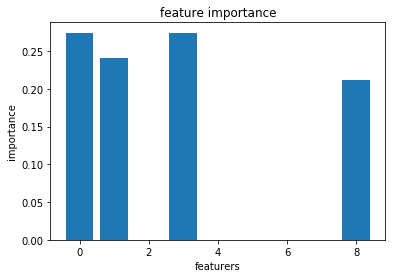

In [82]:
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("featurers")
pyplot.ylabel("importance")
pyplot.title("feature importance")
pyplot.show()

In [86]:
df.plot(kind="scatter",x="play",y="clf")

KeyError: 'clf'